In [12]:
import pandas as pd
import matplotlib.pyplot as plot
from datetime import datetime, timedelta
import urllib.request
import urllib.error
from io import StringIO
import time


def CarregaSerie(data_inicial, data_final, codigo, max_tentativas=3):
    """
    Carrega séries temporais do Banco Central do Brasil
    
    Parâmetros:
    data_inicial (str): Data inicial no formato 'DD/MM/YYYY'
    data_final (str): Data final no formato 'DD/MM/YYYY'
    codigo (int): Código da série temporal do BCB
    max_tentativas (int): Número máximo de tentativas em caso de erro
    
    Retorna:
    DataFrame com os dados da série
    """
    
    # Valida formato das datas
    try:
        datetime.strptime(data_inicial, '%d/%m/%Y')
        datetime.strptime(data_final, '%d/%m/%Y')
    except ValueError:
        raise ValueError("Datas devem estar no formato DD/MM/YYYY")
    
    # URL da API do BCB
    url_bcb = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=csv&dataInicial={data_inicial}&dataFinal={data_final}"
    
    print(f"Carregando série {codigo} de {data_inicial} até {data_final}...")
    print(f"URL: {url_bcb}")
    
    # Tenta carregar com retry
    for tentativa in range(1, max_tentativas + 1):
        try:
            # Faz requisição com timeout
            req = urllib.request.Request(url_bcb)
            req.add_header('User-Agent', 'Mozilla/5.0')
            
            with urllib.request.urlopen(req, timeout=30) as response:
                content = response.read().decode('utf-8')
            
            # Lê CSV da resposta
            serie = pd.read_csv(StringIO(content), sep=";", decimal=',')
            
            # Valida se retornou dados
            if serie.empty:
                print(f"⚠️  Nenhum dado retornado para o código {codigo}")
                return None
            
            # Converte coluna de data
            serie['data'] = pd.to_datetime(serie['data'], format='%d/%m/%Y')
            
            # Converte valor para float (já tratando vírgula como decimal)
            serie['valor'] = serie['valor'].astype(float)
            
            print(f"✓ Série carregada com sucesso! {len(serie)} registros")
            print(f"Período: {serie['data'].min().strftime('%d/%m/%Y')} até {serie['data'].max().strftime('%d/%m/%Y')}")
            print(f"Último valor: {serie['valor'].iloc[-1]:.4f}")
            
            return serie
            
        except urllib.error.HTTPError as e:
            print(f"✗ Tentativa {tentativa}/{max_tentativas} - Erro HTTP {e.code}: {e.reason}")
            if e.code == 404:
                print(f"⚠️  Série {codigo} não encontrada. Verifique o código.")
                return None
            elif e.code == 400:
                print(f"⚠️  Requisição inválida. Verifique as datas e formato.")
                return None
                
        except urllib.error.URLError as e:
            print(f"✗ Tentativa {tentativa}/{max_tentativas} - Erro de conexão: {e.reason}")
            
        except TimeoutError:
            print(f"✗ Tentativa {tentativa}/{max_tentativas} - Timeout na requisição")
            
        except Exception as e:
            print(f"✗ Erro inesperado: {type(e).__name__}: {e}")
            if tentativa == max_tentativas:
                return None
        
        # Aguarda antes de tentar novamente
        if tentativa < max_tentativas:
            print(f"Aguardando 2 segundos antes de tentar novamente...")
            time.sleep(2)
    
    print(f"✗ Falha ao carregar série após {max_tentativas} tentativas")
    return None



## Selic

---
4189 Selic acumulada no mês anualizada base 252	 % aa

---
4390 Selic acumulada no mês	% a.m.

---
11 Selic	% a.d.

---
432	 Meta Selic definida pelo Copom	% a.a.

---
1178 Selic anualizada base 252	% a.a.

---

In [13]:
escolha = "Selic (% ad)" #@param ["Selic acumulada no mes anualizada base 252 (% aa)","Selic acumulada no mes (% a.m.)","Selic (% ad)","Meta Selic definida pelo Copom (% a.a.)","Selic anualizada base 252 (% a.a.)"]

BCS = { 'Selic acumulada no mes anualizada base 252 (% aa)' : 4189,
        'Selic acumulada no mes (% am)' : 4390,
        'Selic (% ad)' : 11,
        'Meta Selic definida pelo Copom (% aa)': 432,
        'Selic anualizada base 252 (% aa)' : 1178
}

Carregando série 11 de 01/01/2015 até 28/04/2023...
URL: https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&dataInicial=01/01/2015&dataFinal=28/04/2023
✓ Série carregada com sucesso! 2087 registros
Período: 02/01/2015 até 28/04/2023
Último valor: 0.0508


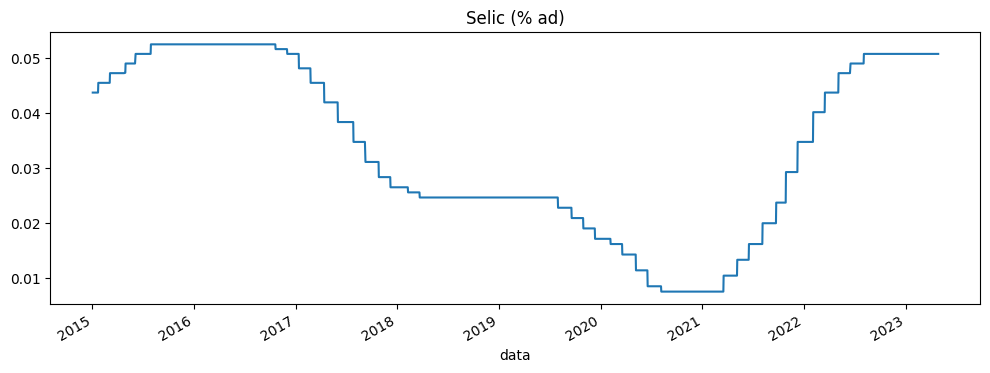

In [14]:
serie = CarregaSerie("01/01/2015","28/04/2023",BCS[escolha])

serie1 = serie.replace({',':'.'}, regex=True)
serie1['valor'] = serie1['valor'].astype(float)
serie1.plot.line(x="data",y="valor",title= f"{escolha}",legend=False,figsize=(12,4))

plot.show(block=True)

## IPCA
---
433	Indice nacional de precos ao consumidor-amplo (IPCA)	% mensal

---
|1635 Alimentacão e bebidas | 1636	 Habitacão | 1637 Artigos de residência	| 1638	Vestuario	| 1639 Transportes | 1640	Comunicacão	| 1641 Saude e cuidados pessoais | 1642	Despesas pessoais | 1643	Educacão | 1655	ComercializAveis	| 4448	Não comercializAveis | 4449 Administrados	| 4450 Precos monitorados IPTU | 4451 Taxa de Agua e esgoto | 4452 GAs de bujão | 4453 Precos monitorados  Energia elétrica | 4454 Ônibus urbano | 4458 Precos monitorados - Gasolina | 4459 Precos monitorados - Alcool | 4460 Precos monitorados - oleo diesel| 4461  Precos monitorados - Plano de saude	| 4463 Precos monitorados - Telefone fixo	| 4464 Precos monitorados - Telefone celular |

---
11753	Indice da taxa de cambio real (IPCA) - Dolar americano

---
13522	Indice nacional de precos ao consumidor - amplo (IPCA) - em 12 meses

In [15]:
escolha = "IPCA amplo em 12 meses" #@param ['IPCA amplo (% am)','Alimentacao e bebidas','Habitacão','Artigos de residencia','Vestuario','Transportes','Comunicacao','Saude e cuidados pessoais','Despesas pessoais','Educacao','Comercializaveis','Nao comercializaveis','Administrados','Precos monitorados IPTU','Precos monitorados Taxa de agua e esgoto','Precos monitorados GAs de bujao','Precos monitorados Energia eletrica','Precos monitorados Onibus urbano','Precos monitorados Gasolina','Precos monitorados Alcool','Precos monitorados Oleo diesel','Precos monitorados Plano de saude','Precos monitorados Telefone fixo','Precos monitorados Telefone celular','Indice da taxa de cambio real(IPCA)-Dolar americano','IPCA amplo em 12 meses']

BCI = {
        'IPCA amplo (% am)' : 433 ,
     'Alimentacão e bebidas' : 1635,
     'Habitacão' : 1636,
     'Artigos de residência' : 1637,
     'VestuArio' : 1638,
     'Transportes' : 1639,
     'Comunicacão' : 1640,
     'Saude e cuidados pessoais' : 1641 ,
     'Despesas pessoais' : 1642,
     'Educacão' : 1643,
     'ComercializAveis' : 1655,
     'Não comercializAveis' : 4448,
     'Administrados' : 4449,
     'Precos monitorados IPTU' : 4450,
     'Precos monitorados Taxa de Agua e esgoto' : 4451,
     'Precos monitorados GAs de bujão' : 4452,
     'Precos monitorados Energia elétrica' : 4453,
     'Precos monitorados Ônibus urbano' : 4454,
     'Precos monitorados Gasolina' : 4458,
     'Precos monitorados Alcool' : 4459,
     'Precos monitorados oleo diesel' : 4460,
     'Precos monitorados Plano de saude' : 4461,
     'Precos monitorados Telefone fixo' : 4463,
     'Precos monitorados Telefone celular' : 4464,
     'Indice da taxa de cambio real(IPCA)-Dolar americano' : 11753,
     'IPCA amplo em 12 meses' : 13522
     }

In [16]:
escolha = 'IPCA amplo (% am)'

Carregando série 433 de 01/01/2004 até 28/04/2023...
URL: https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=csv&dataInicial=01/01/2004&dataFinal=28/04/2023
✓ Série carregada com sucesso! 232 registros
Período: 01/01/2004 até 01/04/2023
Último valor: 0.6100


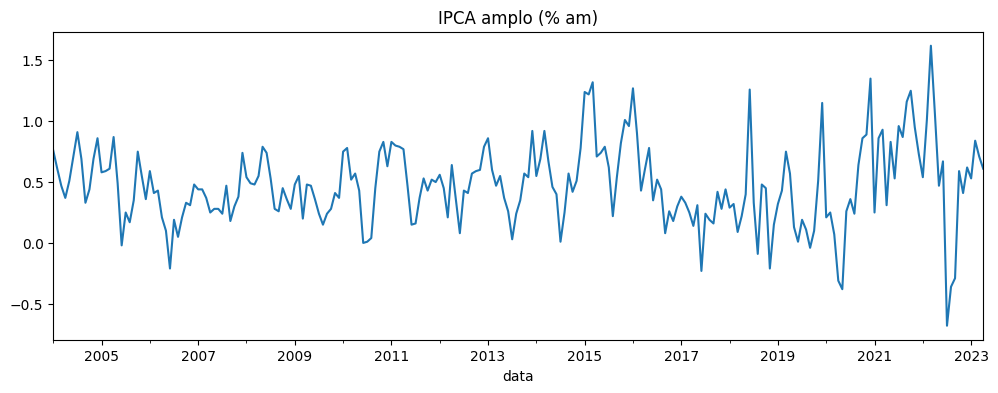

In [17]:
serie = CarregaSerie("01/01/2004","28/04/2023",BCI[escolha])

serie1 = serie.replace({',':'.'}, regex=True)
serie1['valor'] = serie1['valor'].astype(float)
serie1.plot.line(x="data",y="valor",title= f"{escolha}",legend=False,figsize=(12,4))

plot.show(block=True)

In [18]:
(serie1.valor+1).cumprod()

0      1.760000e+00
1      2.833600e+00
2      4.165392e+00
3      5.706587e+00
4      8.616946e+00
           ...     
227    1.965050e+35
228    3.006527e+35
229    5.532009e+35
230    9.459735e+35
231    1.523017e+36
Name: valor, Length: 232, dtype: float64

#### TItulos federais atrelados ao IPCA

---
12466	Indice de Mercado Anbima dos tItulos publicos federais atrelados ao IPCA - IMA-B	diArio

---
12467	Indice de Mercado Anbima dos tItulos publicos federais atrelados ao IPCA com maturidade inferior a cinco anos - IMA-B diArio

---
12468	Indice de Mercado Anbima dos tItulos publicos federais atrelados ao IPCA com maturidade igual ou superior a cinco anos - IMA-B 5+	 diArio


In [19]:
escolha =  'IMA-B diario' #@param ['IMA-B diario','IMA-B 5- diario','IMA-B 5+ diario']

BCTI = {
    'IMA-B diario' : 12466 ,
    'IMA-B 5- diario' : 12467 ,
    'IMA-B 5+ diario' : 12468
}

Carregando série 12466 de 01/01/2011 até 28/04/2020...
URL: https://api.bcb.gov.br/dados/serie/bcdata.sgs.12466/dados?formato=csv&dataInicial=01/01/2011&dataFinal=28/04/2020
✓ Série carregada com sucesso! 2339 registros
Período: 03/01/2011 até 28/04/2020
Último valor: 7232.8329


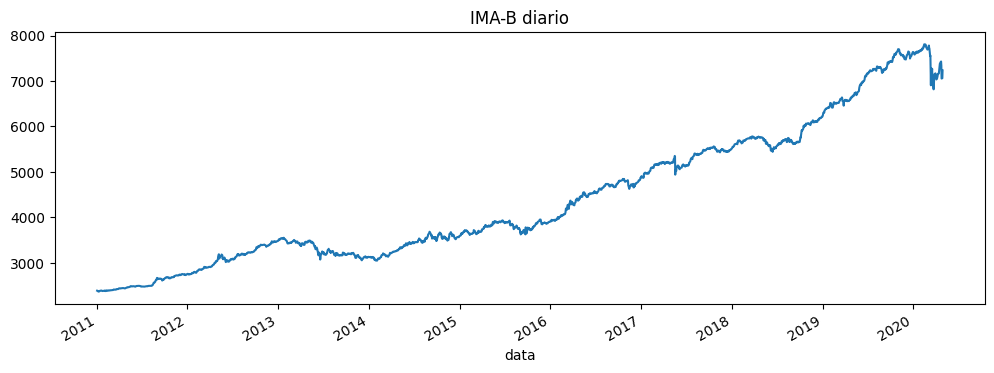

In [22]:
serie = CarregaSerie("01/01/2011","28/04/2020",BCTI[escolha])

serie1 = serie.replace({',':'.'}, regex=True)
serie1['valor'] = serie1['valor'].astype(float)
serie1.plot.line(x="data",y="valor",title= f"{escolha}",legend=False,figsize=(12,4))

plot.show(block=True)

## CDI

---
12	Taxa de juros - CDI	% a.d.

---
4389	Taxa de juros - CDI anualizada base 252	% a.a.

---
4391	Taxa de juros - CDI acumulada no mês	% a.m.

---
4392	Taxa de juros - CDI acumulada no mês anualizada base 252	% a.a.


In [ ]:
escolha = 'CDI acumulada no mes % am' #@param ['CDI % ad','CDI anualizada base 252 % aa','CDI acumulada no mes % am','CDI acumulada no mes anualizada base 252 % aa']

BCCDI = {
    'CDI % ad' : 12 ,
    'CDI anualizada base 252 % aa' : 4389 ,
    'CDI acumulada no mes % am': 4391 ,
    'CDI acumulada no mes anualizada base 252 % aa': 4392
}

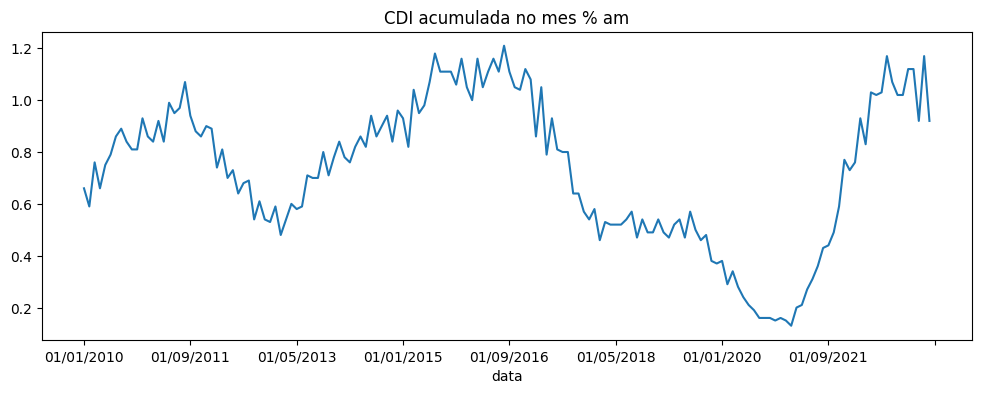

In [ ]:
serie = CarregaSerie("01/01/2010","28/04/2020",BCCDI[escolha])

serie1 = serie.replace({',':'.'}, regex=True)
serie1['valor'] = serie1['valor'].astype(float)
serie1.plot.line(x="data",y="valor",title= f"{escolha}",legend=False,figsize=(12,4))

plot.show(block=True)